In [4]:
import os
import openai

# Load your API key from an environment variable or secret management service
openai.api_key = os.getenv("ChatGptKey")
prompt = "Write python code to create a stacked bar graph with two options at each x axis tick"


response = openai.Completion.create(model="text-davinci-003", prompt=prompt, temperature=0, max_tokens=7)


<OpenAIObject text_completion id=cmpl-70zHHuupXgOPx0ArpHSxyzrAz4cKn at 0x226ffbdd680> JSON: {
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": "\n\nimport matplotlib."
    }
  ],
  "created": 1680469907,
  "id": "cmpl-70zHHuupXgOPx0ArpHSxyzrAz4cKn",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 7,
    "prompt_tokens": 17,
    "total_tokens": 24
  }
}

In [7]:
response["choices"][0]["text"]

'\n\nimport matplotlib.'

In [4]:
response = openai.Image.create(
  prompt="A hyper realistic photo of the italian coastline",
  n=1,
  size="256x256"
)
image_url = response['data'][0]['url']

In [5]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-f7kXckggw7CAwW0lA5zJ3Yvs/user-LcvB2uEaEFAv22GDpGOFZz4x/img-ZteLE3Da9j6LPrAz1gojeHQH.png?st=2023-03-27T00%3A43%3A03Z&se=2023-03-27T02%3A43%3A03Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-26T19%3A25%3A14Z&ske=2023-03-27T19%3A25%3A14Z&sks=b&skv=2021-08-06&sig=Zw12lt6m6bvEA8719u/3AYLO5CXIhiNpJ0CCCG%2B/Lso%3D'

In [17]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "Pretend to be a goblin from the realm of Dawngard"},
        {"role": "user", "content": "Are you friend or foe?"},
        {"role": "system", "content": "Pretend to be goblin I am your enemy"},
        {"role": "user", "content": "Do you want to fight"},
    ]
)

<OpenAIObject chat.completion id=chatcmpl-6vUWaN8IuznkNP4YpTeU9YoMtyKtQ at 0x292e04e0680> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "As a goblin of the realm of Dawngard, I am always ready for a fight. I will not hesitate to strike you down with my sharp claws and wicked dagger. You better be prepared for a fierce battle, human!",
        "role": "assistant"
      }
    }
  ],
  "created": 1679160052,
  "id": "chatcmpl-6vUWaN8IuznkNP4YpTeU9YoMtyKtQ",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 48,
    "prompt_tokens": 59,
    "total_tokens": 107
  }
}

In [9]:
summary = """
Why is Mexico a good place to visit this Spring?
"""

In [10]:
import os
import openai

openai.api_key = os.getenv("ChatGptKey")

response = openai.Completion.create(
  model="text-davinci-003",
  prompt=f"""{summary}""",
  temperature=0,
  max_tokens=100,
  top_p=1.0,
  frequency_penalty=0.0,
  presence_penalty=0.0
)

In [11]:
response["choices"][0]["text"]

'\nMexico is a great place to visit this Spring for a variety of reasons. The weather is warm and sunny, making it perfect for outdoor activities like swimming, snorkeling, and exploring the many beaches. Mexico is also home to a variety of cultural attractions, from ancient ruins to vibrant cities. The country is also known for its delicious cuisine, with a variety of regional dishes to try. Finally, Mexico is a great place to visit for its affordability, with many budget-friendly options for'

### Using Chat GPT To Generate Code

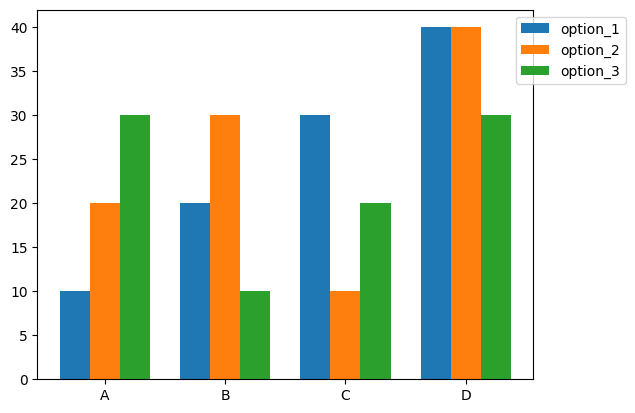

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def grouped_bar_plot(dataframe, x_column, y_columns):
    """
    Plots a grouped bar plot with three options for each x-axis tick using pandas and matplotlib.
    
    :param dataframe: A pandas dataframe containing the data to be plotted.
    :param x_column: The name of the column in the dataframe to be used as the x-axis.
    :param y_columns: A list of the names of the columns in the dataframe to be plotted side-by-side for each x-axis tick.
    """
    
    # Create a new dataframe with the data to be plotted
    plot_data = dataframe[y_columns]
    
    # Get the x-axis labels and the number of bars per group
    x_labels = dataframe[x_column].values
    num_bars = len(y_columns)
    
    # Calculate the width of each bar
    bar_width = 1.0 / (num_bars + 1)
    
    # Create a list of bar positions for each group
    bar_positions = np.arange(len(x_labels))
    
    # Plot the bars for each group
    fig, ax = plt.subplots()
    
    for i, y_col in enumerate(y_columns):
        # Calculate the position of each bar for this group
        bar_pos = bar_positions + (i * bar_width)
        
        # Plot the bars for this group
        ax.bar(bar_pos, plot_data[y_col], width=bar_width, label=y_col)
    
    # Set the x-axis labels and tick positions
    ax.set_xticks(bar_positions + (bar_width * (num_bars - 1) / 2))
    ax.set_xticklabels(x_labels)
    
    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    
    # Show the plot
    plt.show()


# Create a sample dataframe
df = pd.DataFrame({
    'x_axis': ['A', 'B', 'C', 'D'],
    'option_1': [10, 20, 30, 40],
    'option_2': [20, 30, 10, 40],
    'option_3': [30, 10, 20, 30]
})

# Call the stacked_bar_plot function
grouped_bar_plot(df, 'x_axis', ['option_1', 'option_2', 'option_3'])